##**Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Import Packages**

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint
import matplotlib.pyplot as plt

##**Loading Dataset**

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/BTP/Files/train_data.csv", encoding='utf-8')
test_data = pd.read_csv("/content/drive/MyDrive/BTP/Files/test_data.csv", encoding='utf-8')
valid_data = pd.read_csv("/content/drive/MyDrive/BTP/Files/valid_data.csv", encoding='utf-8')

In [4]:
Y_train = train_data['label'].values
Y_test = test_data['label'].values
Y_valid = valid_data['label'].values

In [5]:
X_train = train_data.drop(['label','statement'], axis = 1).values
X_test = test_data.drop(['label','statement'], axis = 1).values
X_valid = valid_data.drop(['label','statement'], axis = 1).values

In [6]:
X_train.shape

(48379, 85)

##**Model**

In [7]:
csv_log = CSVLogger("/content/drive/MyDrive/BTP/Results/model2_results.csv")

filepath = '/content/drive/MyDrive/BTP/Results/my_best_model2.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

callbacks = [checkpoint, csv_log]

In [ ]:
# model = keras.Sequential(
#     [
#         Input(shape=(85,)),
#         Dense(256,activation='relu'),
#         Dense(128,activation='relu'),
#         Dropout(0.5),
#         Dense(64, activation='relu'),
#         Dropout(0.5),
#         Dense(16, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ]
#     )
# model.compile(loss = "binary_crossentropy", optimizer = 'adam',metrics=['accuracy'])
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               22016     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 1

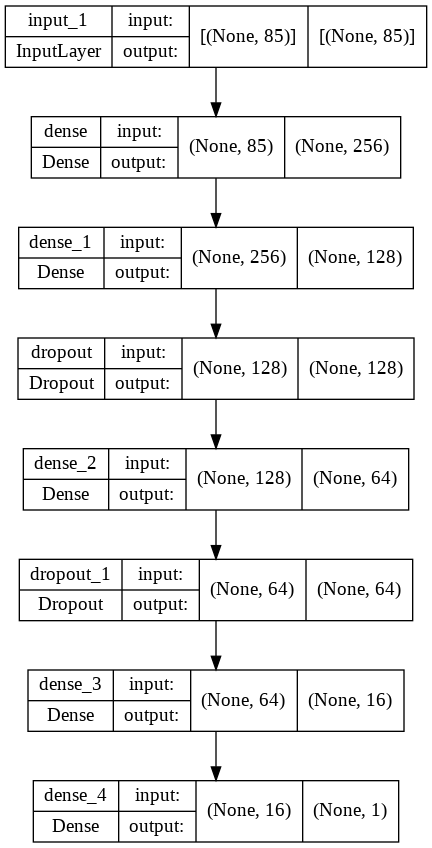

In [ ]:
# plot_model(model, show_shapes=True)

In [ ]:
# history = model.fit(x=X_train, y=Y_train, batch_size=64, epochs=25, validation_data=[X_valid,Y_valid] , callbacks=callbacks)

Epoch 1/25
754/756 [============================>.] - ETA: 0s - loss: 0.7159 - accuracy: 0.6539
Epoch 1: val_accuracy improved from -inf to 0.73847, saving model to /content/drive/MyDrive/BTP/Results/my_best_model2.hdf5
756/756 [==============================] - 7s 5ms/step - loss: 0.7154 - accuracy: 0.6541 - val_loss: 0.5021 - val_accuracy: 0.7385
Epoch 2/25
747/756 [============================>.] - ETA: 0s - loss: 0.5110 - accuracy: 0.7372
Epoch 2: val_accuracy improved from 0.73847 to 0.75391, saving model to /content/drive/MyDrive/BTP/Results/my_best_model2.hdf5
756/756 [==============================] - 3s 4ms/step - loss: 0.5105 - accuracy: 0.7375 - val_loss: 0.4940 - val_accuracy: 0.7539
Epoch 3/25
755/756 [============================>.] - ETA: 0s - loss: 0.4822 - accuracy: 0.7531
Epoch 3: val_accuracy improved from 0.75391 to 0.75670, saving model to /content/drive/MyDrive/BTP/Results/my_best_model2.hdf5
756/756 [==============================] - 5s 7ms/step - loss: 0.4821 - 

In [8]:
model = load_model(filepath)

In [9]:
score = model.evaluate(x=X_test,y= Y_test)
print(score)

720/720 [==============================] - 7s 4ms/step - loss: 0.3593 - accuracy: 0.8051
[0.35925957560539246, 0.8050696849822998]


In [10]:
score = model.evaluate(x=X_train,y= Y_train)
print(score)

1512/1512 [==============================] - 3s 2ms/step - loss: 0.3303 - accuracy: 0.8259
[0.33027738332748413, 0.8258541822433472]


In [12]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

In [13]:
train_pred = pd.DataFrame(train_predictions, columns = ['predictions'])
test_pred = pd.DataFrame(test_predictions, columns = ['predictions'])

In [14]:
train_pred.to_csv("/content/drive/MyDrive/BTP/Results/model2_train_pred.csv", encoding='utf-8', index = False)
test_pred.to_csv("/content/drive/MyDrive/BTP/Results/model2_test_pred.csv", encoding='utf-8', index = False)